In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [12]:
def AND(inputs):
    return 1 if np.all(inputs == 1) else 0

def OR(inputs):
    return 1 if np.any(inputs == 1) else 0

def NAND(inputs):
    return 1 - AND(inputs)

def NOR(inputs):
    return 1 - OR(inputs) 

def XOR(inputs):
    return 1 if np.sum(inputs) % 2 != 0 else 0

def XNOR(inputs):
    return 1 - XOR(inputs) 

def Tautology(inputs):
    return 1 #return 1 regardless of inputs

def Contradiction(inputs):
    return 0 #return 0 regardless of inputs

In [84]:
gates = [AND, OR, NAND, NOR, XOR, XNOR, Tautology, Contradiction]

N = 10
K = 2
W = np.random.choice((0,1), size = (N, N))
iter_ = 100
for _ in range(iter_):
    for i in range(N):
        for j in range(N):
            idxs = np.random.choice(N, (K, 2))
            inputs = np.array([W[row, col] for row, col in idxs])
            gate = np.random.choice(gates)
            W[i, j] = gate(inputs)

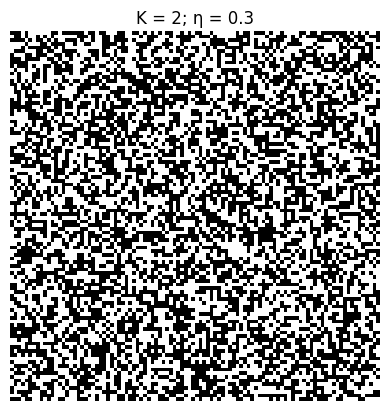

In [91]:
N = 100
K = 2
W = np.random.choice((0,1), size = (N, N))
iter_ = 100 #number of iterations

idxs = [np.random.choice(N, (K, 2)) for _ in range(N)] #Interactions
gate_choice = np.random.choice(gates, (N, N)) # Choice gate for each node

#choosing number of noisy points
η = 0.3 #noise frac
noised_points = int(η * (N**2))

fig, ax1 = plt.subplots()
img1 = ax1.imshow(W, cmap="gray", vmin=0, vmax=1) 
ax1.set_title(f"K = {K}; η = {η}")
ax1.axis("off")

def update(*args):
    global W

    #Adding noise
    noise_idxs = np.random.choice(N, (noised_points, 2))
    W[noise_idxs] = 1 - W[noise_idxs] # flip bits
    
    for i in range(N):
        for j in range(N):        
            inputs = np.array([W[row, col] for row, col in idxs[i]])  
            W[i, j] = gate_choice[i, j](inputs)

    img1.set_array(W) 
    return img1,


    
Writer = animation.writers["ffmpeg"]
writer = Writer(fps=10, metadata=dict(artist="Me"), bitrate=1800)


ani = animation.FuncAnimation(fig, update, frames=iter_, interval=100, blit=True)
ani.save("RBN.mp4", writer=writer)
plt.show()